In [1]:
import pandas as pd
df = pd.read_csv('Islander_data.csv')
df.head()

first_name last_name  age Happy_Sad_group  Dosage Drug  Mem_Score_Before  \
0    Bastian  Carrasco   25               H       1    A              63.5   
1       Evan  Carrasco   52               S       1    A              41.6   
2  Florencia  Carrasco   29               H       1    A              59.7   
3      Holly  Carrasco   50               S       1    A              51.7   
4     Justin  Carrasco   52               H       1    A              47.0   

   Mem_Score_After  Diff  
0             61.2  -2.3  
1             40.7  -0.9  
2             55.1  -4.6  
3             51.2  -0.5  
4             47.1   0.1

In [2]:
#Let's get rid of those names since we won't need them.
df = df.drop(columns=['first_name','last_name'])
df

age Happy_Sad_group  Dosage Drug  Mem_Score_Before  Mem_Score_After  Diff
0     25               H       1    A              63.5             61.2  -2.3
1     52               S       1    A              41.6             40.7  -0.9
2     29               H       1    A              59.7             55.1  -4.6
3     50               S       1    A              51.7             51.2  -0.5
4     52               H       1    A              47.0             47.1   0.1
..   ...             ...     ...  ...               ...              ...   ...
193   52               H       3    T              71.3             74.3   3.0
194   41               S       3    T              72.5             70.4  -2.1
195   54               S       3    T              30.8             33.1   2.3
196   40               H       3    T              53.6             53.8   0.2
197   32               S       3    T              43.1             42.1  -1.0

[198 rows x 7 columns]

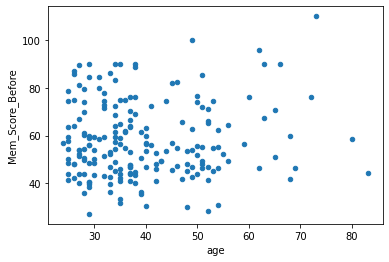

In [3]:
#First, let's see how it will look like plotted out.
import matplotlib.pyplot as plt
df.plot.scatter('age','Mem_Score_Before')
plt.show()

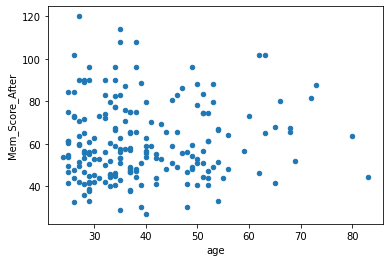

In [4]:
df.plot.scatter('age','Mem_Score_After')
plt.show()

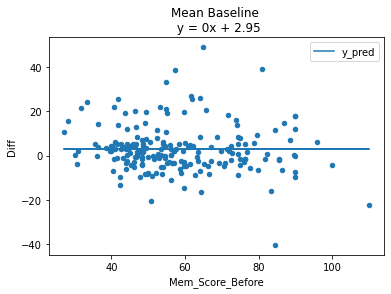

In [5]:
#You'd know what would be good to have? Mean Baseline!
ax = df.plot.scatter('Mem_Score_Before', 'Diff')
mean = df['Diff'].mean()
df['y_pred'] = mean
title = f'Mean Baseline \n y = 0x + {mean:.2f}'
df.plot('Mem_Score_Before', 'y_pred', ax=ax, title=title);

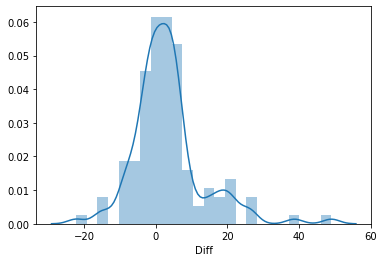

In [6]:
#What do we need for predictive modeling? Trains, test and validation data!
from sklearn.model_selection import train_test_split
train,test=train_test_split(df, train_size=0.8, test_size=0.2)
train,val = train_test_split(train,train_size=0.8,test_size=0.2)
target = 'Mem_Score_After'
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]
import seaborn as sns
#Now, on a previous assignment, we ran a distribution plot on the dataframe and it wasn't skewed.
#In order to see if it split properly, it should be still mid-focused if we ran it on the train.
sns.distplot(train['Diff']);

In [7]:
#I chose this particular dataset because it's squeaky clean;
#despite it being relatively small, it shouldn't have any NaN's.
#It always doesn't have any outliers, at least none that have no importance.
train.isnull().sum()

age                 0
Happy_Sad_group     0
Dosage              0
Drug                0
Mem_Score_Before    0
Mem_Score_After     0
Diff                0
y_pred              0
dtype: int64

In [8]:
#I believe that another reason why there is no real 'outlier' in this data
#would be that Mem_Score_Before, Mem_Score_After, and Diff all tie in together,
#making every piece of data essential and important.
#There is also very strong correlation between the mood and the difference.
train.describe(include='all')

age Happy_Sad_group      Dosage Drug  Mem_Score_Before  \
count   126.000000             126  126.000000  126        126.000000   
unique         NaN               2         NaN    3               NaN   
top            NaN               S         NaN    S               NaN   
freq           NaN              64         NaN   50               NaN   
mean     38.857143             NaN    2.079365  NaN         57.291270   
std      12.167967             NaN    0.806009  NaN         15.533129   
min      24.000000             NaN    1.000000  NaN         30.100000   
25%      29.000000             NaN    1.000000  NaN         46.050000   
50%      35.000000             NaN    2.000000  NaN         53.700000   
75%      46.500000             NaN    3.000000  NaN         65.475000   
max      80.000000             NaN    3.000000  NaN        110.000000   

        Mem_Score_After        Diff        y_pred  
count        126.000000  126.000000  1.260000e+02  
unique              NaN         NaN           NaN  
top                 NaN         NaN           NaN  
freq                NaN         NaN           NaN  
mean          60.615079    3.323810  2.954545e+00  
std           17.868677    9.874042  8.917241e-16  
min           27.100000  -22.200000  2.954545e+00  
25%           47.450000   -2.000000  2.954545e+00  
50%           56.450000    2.050000  2.954545e+00  
75%           73.100000    5.650000  2.954545e+00  
max          114.000000   49.000000  2.954545e+00

In [9]:
#For clarity reasons, let's rename the letters in the drug column to what they are standing for.
#This way, we won't have to constantly keep referring to the key.
train['Drug']=train['Drug'].replace({'S':'Sugar','T':'Triazolam','A':'Alprazolam'})
train

age Happy_Sad_group  Dosage        Drug  Mem_Score_Before  \
145   32               S       1   Triazolam              72.9   
78    72               S       1       Sugar              76.2   
52    30               H       3  Alprazolam              43.6   
161   54               H       2   Triazolam              55.2   
166   65               H       2   Triazolam              70.9   
..   ...             ...     ...         ...               ...   
2     29               H       1  Alprazolam              59.7   
75    45               S       1       Sugar              45.8   
176   50               S       2   Triazolam              44.0   
48    35               H       3  Alprazolam              65.0   
170   38               S       2   Triazolam              43.4   

     Mem_Score_After  Diff    y_pred  
145             74.0   1.1  2.954545  
78              81.4   5.2  2.954545  
52              63.0  19.4  2.954545  
161             51.7  -3.5  2.954545  
166             67.8  -3.1  2.954545  
..               ...   ...       ...  
2               55.1  -4.6  2.954545  
75              50.9   5.1  2.954545  
176             40.6  -3.4  2.954545  
48             114.0  49.0  2.954545  
170             47.4   4.0  2.954545  

[126 rows x 8 columns]

In [10]:
train.describe(include='all')

age Happy_Sad_group      Dosage   Drug  Mem_Score_Before  \
count   126.000000             126  126.000000    126        126.000000   
unique         NaN               2         NaN      3               NaN   
top            NaN               S         NaN  Sugar               NaN   
freq           NaN              64         NaN     50               NaN   
mean     38.857143             NaN    2.079365    NaN         57.291270   
std      12.167967             NaN    0.806009    NaN         15.533129   
min      24.000000             NaN    1.000000    NaN         30.100000   
25%      29.000000             NaN    1.000000    NaN         46.050000   
50%      35.000000             NaN    2.000000    NaN         53.700000   
75%      46.500000             NaN    3.000000    NaN         65.475000   
max      80.000000             NaN    3.000000    NaN        110.000000   

        Mem_Score_After        Diff        y_pred  
count        126.000000  126.000000  1.260000e+02  
unique              NaN         NaN           NaN  
top                 NaN         NaN           NaN  
freq                NaN         NaN           NaN  
mean          60.615079    3.323810  2.954545e+00  
std           17.868677    9.874042  8.917241e-16  
min           27.100000  -22.200000  2.954545e+00  
25%           47.450000   -2.000000  2.954545e+00  
50%           56.450000    2.050000  2.954545e+00  
75%           73.100000    5.650000  2.954545e+00  
max          114.000000   49.000000  2.954545e+00

In [11]:
#You know what would've probably helped? If I started off with a profile report!
#Now, I've done that before, but for the sake of the assignment, let's do it right now.
from pandas_profiling import ProfileReport
ProfileReport(train)

In [12]:
#Now, let's OneHotEncode this dataframe and re-run our Profile Report
#so we can see if there is a correlation between mood, drug type and the rest of our statistics.
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
train = encoder.fit_transform(train)
val = encoder.transform(val)
test = encoder.transform(test)
ProfileReport(train)

In [13]:
#Let's drop that H column since the S column already tells us what we need to know.
train.drop(columns=['Happy_Sad_group_H'],inplace=True)
val.drop(columns=['Happy_Sad_group_H'],inplace=True)
test.drop(columns=['Happy_Sad_group_H'],inplace=True)
train

age  Happy_Sad_group_S  Dosage  Drug_Triazolam  Drug_Sugar  \
145   32                  1       1               1           0   
78    72                  1       1               0           1   
52    30                  0       3               0           0   
161   54                  0       2               1           0   
166   65                  0       2               1           0   
..   ...                ...     ...             ...         ...   
2     29                  0       1               0           0   
75    45                  1       1               0           1   
176   50                  1       2               1           0   
48    35                  0       3               0           0   
170   38                  1       2               1           0   

     Drug_Alprazolam  Mem_Score_Before  Mem_Score_After  Diff    y_pred  
145                0              72.9             74.0   1.1  2.954545  
78                 0              76.2             81.4   5.2  2.954545  
52                 1              43.6             63.0  19.4  2.954545  
161                0              55.2             51.7  -3.5  2.954545  
166                0              70.9             67.8  -3.1  2.954545  
..               ...               ...              ...   ...       ...  
2                  1              59.7             55.1  -4.6  2.954545  
75                 0              45.8             50.9   5.1  2.954545  
176                0              44.0             40.6  -3.4  2.954545  
48                 1              65.0            114.0  49.0  2.954545  
170                0              43.4             47.4   4.0  2.954545  

[126 rows x 10 columns]

In [14]:
#Let's select our target and features!
target = 'Diff'
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [15]:
#This doesn't work on Jupyter, for me at least, but I'll keep it anyways
#just in case someone wants to use this.
#Also, I might be able to get it to work on Colab.
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.express as px
fig = px.scatter(train,x = 'Mem_Score_Before', y = 'Mem_Score_After', trendline='ols')
fig.show()

In [16]:
#Let's start with our models and pipelines!
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
pipeline=make_pipeline(
     ce.OneHotEncoder(),
     SimpleImputer(),
     RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42)
)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.7329198651943021


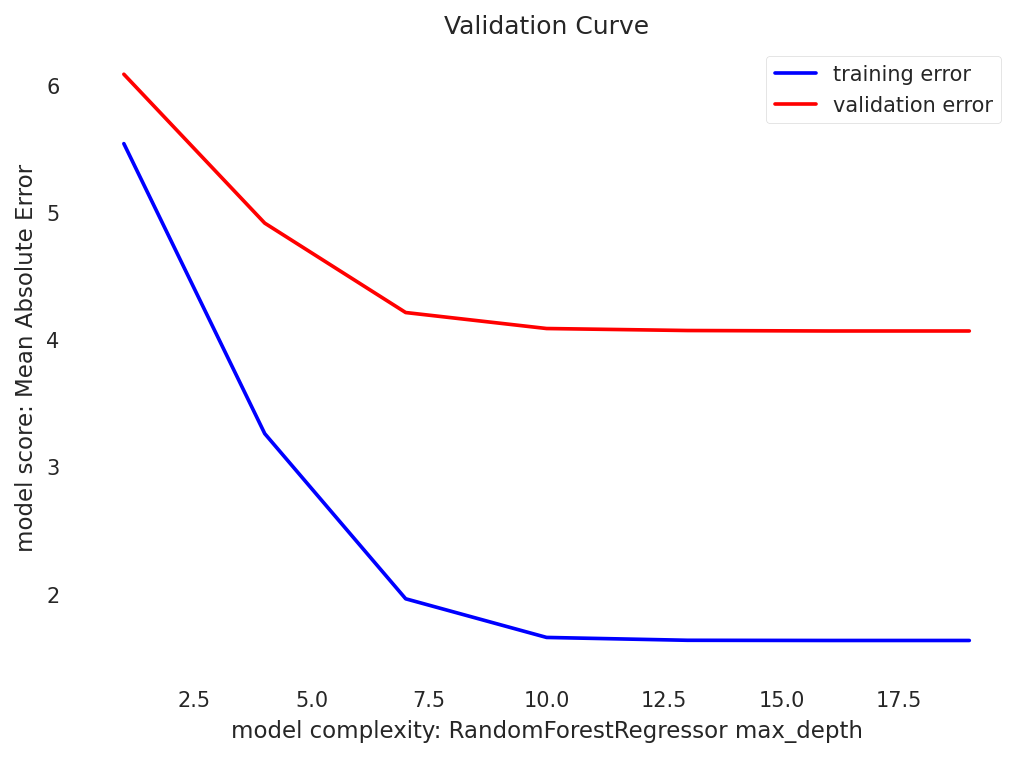

In [18]:
#Not a bad validation accuracy, but let's see if we can make it better.
from sklearn.model_selection import validation_curve
import numpy as np
depth = range(1, 20, 3)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='randomforestregressor__max_depth', 
    param_range=depth, scoring='neg_mean_absolute_error', 
    cv=3,
    n_jobs=-1
)

plt.figure(dpi=150)
plt.plot(depth, np.mean(-train_scores, axis=1), color='black', label='training error')
plt.plot(depth, np.mean(-val_scores, axis=1), color='yellow', label='validation error')
plt.title('Validation Curve')
plt.xlabel('model complexity: RandomForestRegressor max_depth')
plt.ylabel('model score: Mean Absolute Error')
plt.legend();

In [19]:
#Now, last time I ran models, XGBoost was the best approach.
#Let's see if that still holds true.
from xgboost import XGBRegressor
pipeline = make_pipeline(
    ce.OneHotEncoder(),
    XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse=mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
print('Test MSE:',mse)
print('Test R^2:',r2)
print('Test RMSE:',rmse)

Test MSE: 30.02509011623466
Test R^2: 0.7992689606157901
Test RMSE: 5.479515500136364


In [20]:
#Still true apparently! Let's do a search on RFR and see if it does any better.
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=30, 
    cv=20, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)
search.fit(X_train, y_train)

Fitting 20 folds for each of 30 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

RandomizedSearchCV(cv=20, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f55b1aff280>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f55b00fceb0>},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=10)

In [21]:
pipeline = search.best_estimator_
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse=mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
print('Test MSE:',mse)
print('Test R^2:',r2)
print('Test RMSE:',rmse)
print('Test MAE:', mae)

Test MSE: 47.25717348937982
Test R^2: 0.6840648432307606
Test RMSE: 6.874385317203264
Test MAE: 4.916123046874997


In [22]:
#Nope! Way worse! Let's do it on XGB now.
param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    XGBRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)
search.fit(X_train, y_train)
pipeline = search.best_estimator_
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse=mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
print('Test MSE:',mse)
print('Test R^2:',r2)
print('Test RMSE:',rmse)
print('Test MAE:', mae)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[01:29:56] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:29:56] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Test MSE: 30.025090454710053
Test R^2: 0.799268958352932
Test RMSE: 5.479515531021885
Test MAE: 3.945075799524784


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0494s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  13 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished


In [23]:
#I know I posted this same exact code in our search function above,
#that was simply to avoid the error.
#I'm reposting this here so I can get a closer look at our results.
y_pred = pipeline.predict(X_val)
mse=mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
print('Test MSE:',mse)
print('Test R^2:',r2)
print('Test RMSE:',rmse)
print('Test MAE:', mae)

Test MSE: 30.025090454710053
Test R^2: 0.799268958352932
Test RMSE: 5.479515531021885
Test MAE: 3.945075799524784


In [40]:
#as you can see, our search function didn't do much at all.
#In fact, it's almost the same exact results as before.
#That being said, XGB is definitely the preferred approach.
pipeline = make_pipeline(
    ce.OneHotEncoder(),
    XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
mse=mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
print('Test MSE:',mse)
print('Test R^2:',r2)
print('Test RMSE:',rmse)
print('Test MAE:', mae)

Test MSE: 30.02509011623466
Test R^2: 0.7992689606157901
Test RMSE: 5.479515500136364
Test MAE: 3.9450756793841717


In [28]:
#This was on Jupyter, so I'm installing this just in case.
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


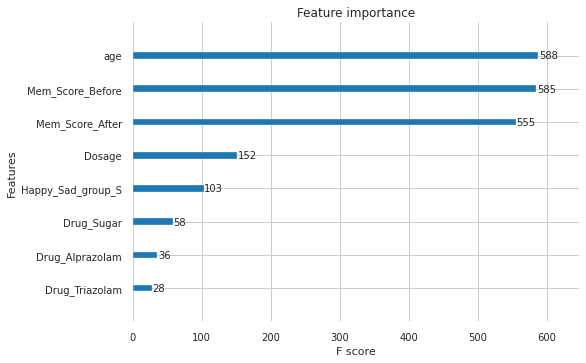

In [34]:
#Let's see if my hypothesis of mood being important holds true!
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_jobs=-1,objective='reg:squarederror')
model_xgb.fit(X_train, y_train)
axsub = xgb.plot_importance(model_xgb)

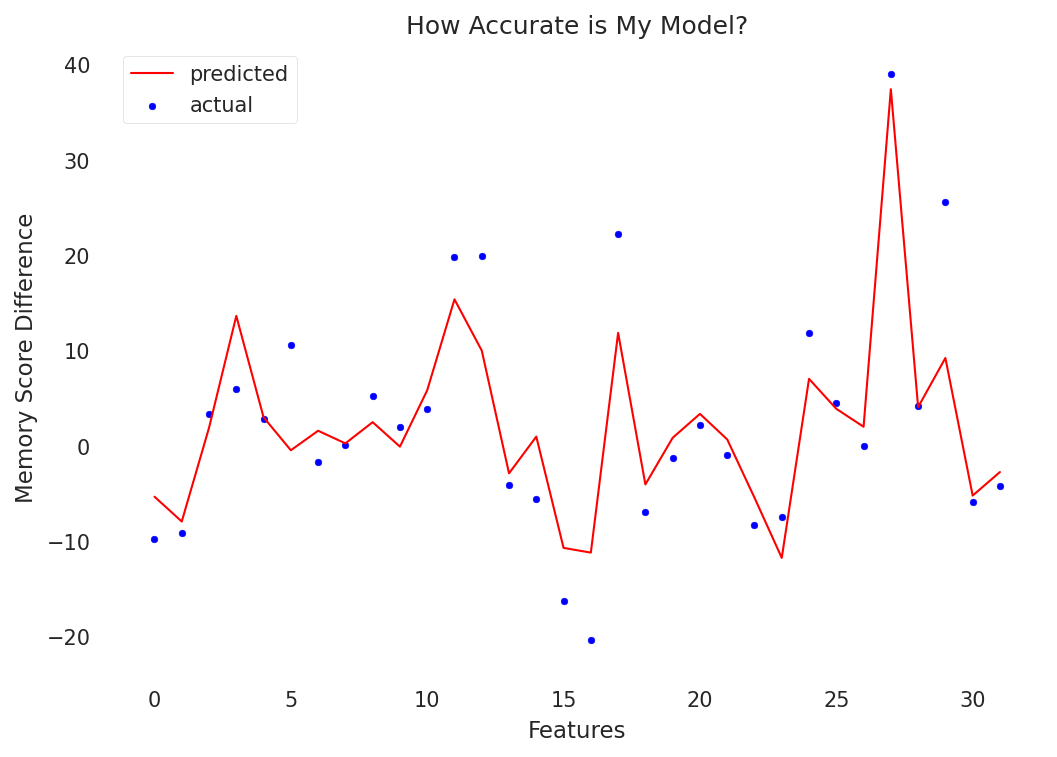

In [82]:
#The egg on my face! Being happy or sad doesn't actually play that much of a roll for difference.
#Let's finish this up by seeing how accurate my model actually is.
y_pred = pipeline.predict(X_val)
X_ax = range(len(y_val))
plt.figure(dpi=150)
plt.scatter (X_ax, y_val, s=10, color= 'blue', label= 'actual')
plt.plot(X_ax, y_pred, lw=1.0, color= 'red', label= 'predicted')
plt.title('How Accurate is My Model?')
plt.xlabel('Features')
plt.ylabel('Memory Score Difference')
plt.legend()
plt.show()